<a href="https://colab.research.google.com/github/daisy2821/ml/blob/master/scikit_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#INTRODUCTION TO SKLEARN

# **0.END TO END  SKLESARN WORKFLOW**

In [ ]:
#1.get data ready
import numpy as np
import pandas as pd
hd=pd.read_csv("heartdisease.csv")

In [ ]:
#create X (feature matrix)
x=hd.drop("target",axis=1)
#create Y (label)
y=hd["target"]

In [ ]:
#2.choose right model&hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
#we ll keep the default parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#3.fit model to training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf.fit(x_train,y_train);

In [ ]:
#make a prediction
y_preds=clf.predict(x_test)
y_preds

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [ ]:
y_test

142    1
226    0
135    1
164    1
247    0
      ..
212    0
294    0
280    0
1      1
9      1
Name: target, Length: 61, dtype: int64

In [ ]:


#4.evaluate a model
clf.score(x_train,y_train)


1.0

In [ ]:

clf.score(x_test,y_test)

0.8360655737704918

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.96      0.75      0.84        36

    accuracy                           0.84        61
   macro avg       0.85      0.85      0.84        61
weighted avg       0.87      0.84      0.84        61



In [ ]:


print(confusion_matrix(y_test,y_preds))

[[24  1]
 [ 9 27]]


In [ ]:

print(accuracy_score(y_test,y_preds))

0.8360655737704918


In [ ]:



#5.improve a model
#try diferent amount of n_estimators
np.random.seed(42)
for i in range (10,100,10):
  print(f"try model with {i} estimators")
  clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
  print(f"model accuracy on test set:{clf.score(x_test,y_test)*100:.2f}%")
  print(" ")

try model with 10 estimators
model accuracy on test set:75.41%
 
try model with 20 estimators
model accuracy on test set:85.25%
 
try model with 30 estimators
model accuracy on test set:81.97%
 
try model with 40 estimators
model accuracy on test set:83.61%
 
try model with 50 estimators
model accuracy on test set:75.41%
 
try model with 60 estimators
model accuracy on test set:77.05%
 
try model with 70 estimators
model accuracy on test set:81.97%
 
try model with 80 estimators
model accuracy on test set:80.33%
 
try model with 90 estimators
model accuracy on test set:80.33%
 


In [ ]:
#6 save a model and load it
import pickle
pickle.dump(clf,open('random_forest_model_1.pkl',"wb"))

In [ ]:
loadedmodel=pickle.load(open("random_forest_model_1.pkl","rb"))

In [ ]:


loadedmodel.score(x_test,y_test)

0.8032786885245902

In [ ]:
import sklearn
sklearn.show_versions()



System:
    python: 3.6.9 (default, Apr 18 2020, 01:56:04)  [GCC 8.4.0]
executable: /usr/bin/python3
   machine: Linux-4.19.104+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
       pip: 19.3.1
setuptools: 47.3.1
   sklearn: 0.22.2.post1
     numpy: 1.18.5
     scipy: 1.4.1
    Cython: 0.29.20
    pandas: 1.0.5
matplotlib: 3.2.2
    joblib: 0.15.1

Built with OpenMP: True


In [ ]:
x=hd.drop("target",axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:

y=hd["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:

#split data into train nd test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [ ]:

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [ ]:

#make sure all is numerical
import pandas as pd


In [ ]:

from sklearn.datasets import load_boston
boston=load_boston()
boston;

In [ ]:
bostondf=pd.DataFrame(boston["data"],columns=boston["feature_names"])
bostondf["target"]=pd.Series(boston["target"])
bostondf.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#trying ridge regression
from sklearn.linear_model import Ridge
#setup random seed
np.random.seed(42)
#create data
x=bostondf.drop("target",axis=1)
y=bostondf["target"]
#split data into test nd train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#instantiate ridge model
model=Ridge()
model.fit(x_train,y_train)
#check the score
model.score(x_test,y_test)

0.6662221670168522

how to improve score
watif regression not working

In [ ]:
#lets try random forest regresion
from sklearn.ensemble import RandomForestRegressor
#setup random seed
np.random.seed(42)
#create data
x=bostondf.drop("target",axis=1)
y=bostondf["target"]
#split data into test nd train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#instantiate rsndomforestRegress
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
#check the score
rf.score(x_test,y_test)

0.873969014117403

In [ ]:
hd=pd.read_csv("heartdisease.csv")
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
len(hd)

303

In [ ]:
#consulting the map nd it says import svc
from sklearn.svm import LinearSVC
#setup random seed
np.random.seed(42)
#data
x=hd.drop('target',axis=1)
y=hd["target"]
#spli the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#linearsvc
clf=LinearSVC(max_iter=1000000)
clf.fit(x_train,y_train)
#check the score
clf.score(x_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8688524590163934

In [ ]:

#randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
#setup random seed
np.random.seed(42)
#data
x=hd.drop('target',axis=1)
y=hd["target"]
#spli the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#linearsvc
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
#check the score
clf.score(x_test,y_test)

0.8524590163934426

In [ ]:
###### fitting nd use it tomake predictions
#fiiting the data

In [ ]:
#randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
#setup random seed
np.random.seed(42)
#data
x=hd.drop('target',axis=1)
y=hd["target"]
#spli the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#linearsvc
clf=RandomForestClassifier()
####fitting the data
clf.fit(x_train,y_train)
#check the score
clf.score(x_test,y_test)

0.8524590163934426

In [ ]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:



y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

In [ ]:

#######MAKE PREDICTIONS

In [ ]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
#compare predictions to truth

In [ ]:
y_preds=clf.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

In [ ]:
###make predictions with predict proba

In [ ]:
clf.predict_proba(x_test.head())

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [ ]:
clf.predict(x_test.head())

array([0, 1, 1, 0, 1])

In [ ]:
hd["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#setup random seed
np.random.seed(42)
#create data
x=bostondf.drop("target",axis=1)
y=bostondf["target"]
#split data into test nd train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#instantiate rsndomforestRegress
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
#make predictions
y_preds=rf.predict(x_test)

In [ ]:


y_preds

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738, 19.516, 19.83 ,  8.885, 21.918, 19.477, 26.465,
       19.347,  8.039, 45.414, 14.542, 24.564, 23.941, 14.481, 23.077,
       15.031, 14.625, 21.171, 14.164, 19.251, 20.717, 19.433, 23.242,
       31.091, 20.39 , 14.294, 15.796, 34.3  , 19.155, 20.639, 24.464,
       18.779, 29.688, 45.257, 19.449, 22.334, 13.727, 15.408, 24.621,
       18.783, 28.247, 21.411, 33.961, 17.011, 26.312, 44.904, 21.988,
       15.65 , 32.316, 22.281, 20.394, 25.405, 34.266, 28.938, 18.857,
       26.909, 17.154, 13.731, 23.079, 28.508, 15.818, 20.41 , 28.38 ,
       10.153, 21.336, 22.393,  7.093, 20.059, 45.424, 10.964, 12.914,
       21.387, 12.29 , 20.234,  9.065, 20.218, 26.736, 15.531, 23.228,
       23.568, 17.719, 21.64 ,  7.991, 19.6  , 18.7  , 22.292, 19.665,
       38.756, 13.03 , 12.49 , 13.406, 20.219, 23.898])

In [ ]:
np.array(y_test)

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4])

In [ ]:


#compare predictions to truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

2.1226372549019623

In [ ]:
# evaluating machine learning model

In [ ]:


#randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
#setup random seed
np.random.seed(42)
#data
x=hd.drop('target',axis=1)
y=hd["target"]
#spli the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#linearsvc
clf=RandomForestClassifier()
####fitting the data
clf.fit(x_train,y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:

###EVALUATING A ML MODEL


In [ ]:

from sklearn.model_selection import cross_val_score
np.random.seed(42)
#data
x=hd.drop('target',axis=1)
y=hd["target"]
#spli the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#linearsvc
clf=RandomForestClassifier()
####fitting the data
clf.fit(x_train,y_train);

In [ ]:



clf.score(x_test,y_test)

0.8524590163934426

In [ ]:
cross_val_score(clf,x,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [ ]:
cross_val_score(clf,x,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [ ]:

np.random.seed(42)
#single training and test split  score
clf_single_score=clf.score(x_test,y_test)
#take mean of 5 crossfold score
clf_cross_val_score=np.mean(cross_val_score(clf,x,y,cv=5))
#compare the two
clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [ ]:



#scoring parameter set to none by default
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

#####CLASSIFICATION MMODEL
1.accuracy
2.area under roc curve
3.confusion matrix
4.classification forest

In [ ]:
#accuracy
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=hd.drop('target',axis=1)
y=hd["target"]
clf=RandomForestClassifier()
cross_val_score=cross_val_score(clf,x,y,cv=5)


In [ ]:

np.mean(cross_val_score)
print(f"heart disease classifier accuracy:{np.mean(cross_val_score)*100:.2f}%")

heart disease classifier accuracy:82.48%


In [ ]:

##area under roc curve

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [ ]:


from sklearn.metrics import roc_curve
clf.fit(x_train,y_train)
#make predictions with probabilities
y_probs=clf.predict_proba(x_test)
y_probs[:10]
#keep positive
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]


array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

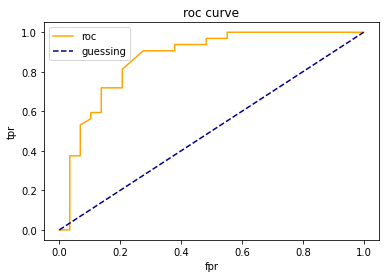

In [ ]:


import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
  "plots a roc curve given the flase positive rates(fpr)and true positive rate(tpr)" 
  #plot curve
  plt.plot(fpr,tpr,color="orange",label="roc")
  #plot line with no predicate power (baseline)
  plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="guessing")
  #customise the plot
  plt.xlabel("fpr")
  plt.ylabel("tpr")
  plt.title("roc curve")
  plt.legend()
  plt.show()

plot_roc_curve(fpr,tpr);


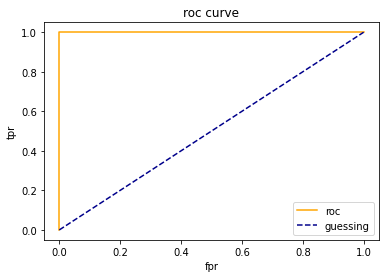

In [ ]:


from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)
#plot perfect roc curve and auc score
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)
#perfect auc score
roc_auc_score(y_test,y_test);

confusiion matrix

In [ ]:

from sklearn.metrics import confusion_matrix
y_preds=clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]])

In [ ]:
#visualize confusin matrix with pd.crosstsb()
pd.crosstab(y_test,y_preds,rownames=["actual labels"],colnames=["predicted label"])

predicted label,0,1
actual labels,,
0,23,6
1,6,26


In [ ]:
len(x_test)

61

In [ ]:
23+12+26

61

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


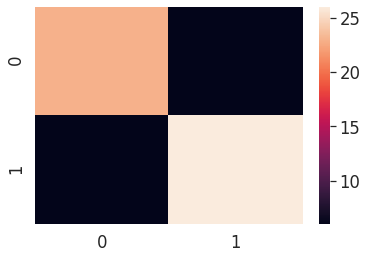

In [ ]:


#make our confusion matrix more visualizable
import seaborn as sns
#set the font
sns.set(font_scale=1.5)
#create confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)
#plot it using seaborn
sns.heatmap(conf_mat);

evaluaitng classification report

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [ ]:
#where precision & recall become valuable
disease_true=np.zeros(10000)
disease_true[0]=1
disease_preds=np.zeros(10000)
pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [ ]:
###regression modek evaluation metrics


In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=bostondf.drop("target",axis=1)
y=bostondf["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train);

In [ ]:

model.score(x_test,y_test)

0.873969014117403

In [ ]:
from sklearn.metrics import r2_score
#fill an array with y_test mean
y_test_mean=np.full(len(y_test),y_test.mean())


In [ ]:

y_test.mean()

21.488235294117654

In [ ]:

r2_score(y_test,y_test_mean)

2.220446049250313e-16

In [ ]:

####MAE


In [ ]:
from sklearn.metrics import mean_absolute_error
y_preds=model.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae

2.1226372549019623

In [ ]:
df=pd.DataFrame(data={"actual values":y_test,"predicted values":y_preds})
df["differences"]=df["predicted values"]-df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


In [ ]:


##MSE


In [ ]:
from sklearn.metrics import mean_squared_error
y_preds=model.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
mse

9.242328990196082

In [ ]:
squared=np.square(df["differences"])
squared.mean()

9.24232899019608

In [ ]:
######evaluating with cross validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=hd.drop("target",axis=1)
y=hd["target"]
clf=RandomForestClassifier()


In [ ]:

np.random.seed(17)
cv_acc=cross_val_score(clf,x,y,cv=5)
cv_acc

array([0.78688525, 0.8852459 , 0.7704918 , 0.81666667, 0.75      ])

In [ ]:
# cross validated accuracy
print(f"the cross validated accuracy is:{np.mean(cv_acc)*100:.2f}%")

the cross validated accuracy is:80.19%


In [ ]:
#accuracy
np.random.seed(17)
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
print(f"the cross validated accuracy is:{np.mean(cv_acc)*100:.2f}%")

the cross validated accuracy is:80.19%


In [ ]:


#precision
np.random.seed(17)
cv_pre=cross_val_score(clf,x,y,cv=5,scoring="precision")
print(f"the precision is:{np.mean(cv_pre)}")


the precision is:0.8151138519924098


In [ ]:
#4.3 using different evaluation


classfication evaluation


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=hd.drop('target',axis=1)
y=hd["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
#make predictions 
y_preds=clf.predict(x_test)
#evaluate classifier
print("classifier metrics on test sset")
print(f"accuracy:{accuracy_score(y_test,y_preds)*100:2f}%")
print(f"precision:{precision_score(y_test,y_preds)}")
print(f"recall:{recall_score(y_test,y_preds)}")



classifier metrics on test sset
accuracy:85.245902%
precision:0.8484848484848485
recall:0.875


In [ ]:
#######improving the model


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:

#tuning hypermaters by randomizedssearch


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
grid={"n_estimators":[10,100,200,500,1000,1200],"max_depth":[None,5,10,20,30],"max_features":["auto","sqrt"],
      "min_samples_split":[2,4,6],"max_samples_leaf":[1,2,4]}
np.random.seed(17)
#split into x,y
x=hd_shuffled.drop("target",axis=1)
y=hd_shuffled["target"]
#instaniate rfc
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#instantiate rfc
clf=RandomForestClassifier(n_jobs=1)
#setup Randomizedsearch
rs_clf=RandomizedSearchCV(estimator=clf,param_distributions=grid,n_iter=10,cv=5,verbose=2)
#fit the randomized cv
rs_clf.fit(x_train,y_train)

NameError: ignored

In [ ]:
grid

{'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'max_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [10, 100, 200, 500, 1000, 1200]}

In [ ]:
grid2={'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'max_samples_leaf': [1, 2],
 'min_samples_split': [6],
 'n_estimators': [100, 200, 500]}

In [ ]:
from sklearn.model_selection import GridSearch
grid={"n_estimators":[10,100,200,500,1000,1200],"max_depth":[None,5,10,20,30],"max_features":["auto","sqrt"],
      "min_samples_split":[2,4,6],"max_samples_leaf":[1,2,4]}
np.random.seed(17)
#split into x,y
x=hd_shuffled.drop("target",axis=1)
y=hd_shuffled["target"]
#instaniate rfc
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#instantiate rfc
clf=RandomForestClassifier(n_jobs=1)
#setup Randomizedsearch
gs_clf=GridSearchCV(estimator=clf,param_distributions=grid,n_iter=10,cv=5,verbose=2)
#fit the randomized cv
gs_clf.fit(x_train,y_train)


ImportError: ignored

In [ ]:
#saving a file

In [ ]:
pickle.dump(clf_cross_val_score,open("clf.pkl","wb"))

In [ ]:
#loading 
loadedpickle=pickle.load(open("clf.pkl","rb"))

In [ ]:
loadedpickle

0.8248087431693989

In [ ]:
##saving usin joblib
from joblib import dump,load

In [ ]:
#save
dump(clf_cross_val_score,filename="clf.joblib")

['clf.joblib']

In [ ]:
#open
loaded=load(filename="clf.joblib")

In [ ]:
loaded

0.8248087431693989

# putting it all together